In [48]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit import RDLogger
import rdkit
from rdkit.Chem.Lipinski import NumHAcceptors
from rdkit.Chem.Lipinski import NumHDonors
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Descriptors import MolLogP

In [4]:
Chem.SDMolSupplier('../data/drugbank.sdf')

In [7]:
cubane = Chem.MolFromSmiles("C12C3C4C1C5C2C3C45")

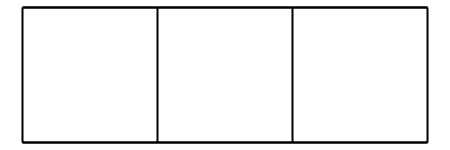

In [8]:
cubane

In [10]:
len(Chem.GetSSSR(cubane))

5

In [11]:
Chem.GetSSSR(cubane)

<rdkit.rdBase._vectclass std::vector<int,class std::allocator<int> > at 0x2000e186c40>

In [19]:
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [20]:
drugbank = [mol for mol in Chem.SDMolSupplier('../data/drugbank.sdf') if mol]

In [31]:
wt = [Descriptors.ExactMolWt(mol) for mol in drugbank]

In [34]:
sum(wt)/len(wt)

356.4173029769798

In [81]:
def Lipinski(drug):
    bool_vec = []
    if NumHAcceptors(drug) > 10:
        bool_vec.append(False)
    if NumHDonors(drug) > 5:
        bool_vec.append(False)
    if ExactMolWt(drug) < 500:
        bool_vec.append(False)
    if MolLogP(drug) > 5:
        bool_vec.append(False)
    return bool_vec

In [82]:
perc = len([len(Lipinski(mol)) for mol in drugbank if len(Lipinski(mol)) in [0, 1]])/len(drugbank)

In [83]:
perc

0.8568820224719101